Cara, eu vou tentar te guiar na forma que eu implementei. Note que essa não é a única maneira de resolver, muito menos a melhor, mas funciona e o resultado bate com o que a professora mostrou um dia. O código completo vai estar no final desse documento. Vamos iniciar importando as bibliotecas necessárias:

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Agora eu vou definir algumas funções que vão facilitar algumas operações repetitivas. A primeira é para exibir duas imagens lado a lado:

In [3]:
def show_figs(fig1, fig2, suptitle, title1, title2):
    plt.subplot(1, 2, 1)
    plt.imshow(fig1, cmap="gray")
    plt.title(title1)
    
    plt.subplot(1, 2, 2)
    plt.imshow(fig2, cmap="gray")
    plt.title(title2)
    
    plt.suptitle(suptitle)
    plt.show()
    plt.close()

A segunda função é a mais importante e que talvez seja a fonte da sua dúvida: ela toma uma matriz de magnitude (real) e uma de fase (também real) e retorna uma matriz complexa:

In [8]:
def real2complex(mag, ang):
	return mag * np.exp(1j*ang)

Pronto, agora estamos prontos pro restante do script. Primeiro, vamos carregar nossas duas imagens de teste e mostrá-las à título de organização:

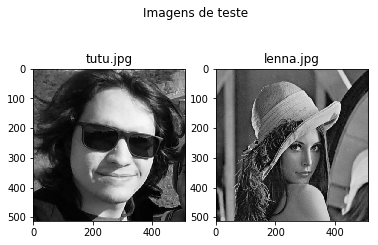

In [9]:
tutu = cv2.imread("tutu.jpg", cv2.IMREAD_GRAYSCALE)
lenna = cv2.imread("lenna.jpg", cv2.IMREAD_GRAYSCALE)

show_figs(tutu,
          lenna,
          "Imagens de teste",
          "tutu.jpg",
          "lenna.jpg")

Massa, até agora tudo bem xD. Com as imagens carregadas, vamos partir para a Transforma de Fourier:

In [10]:
tutu_fft = np.fft.fft2(tutu)
lenna_fft = np.fft.fft2(lenna)

Tudo certo, agora vamos dar uma olhada nas magnitudes e fases das imagens. Aqui a gente usa abs(), fft2shif() e angle():

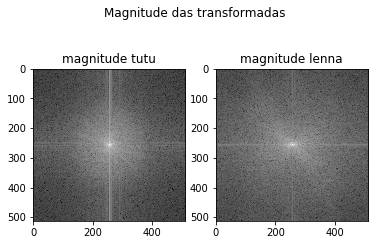

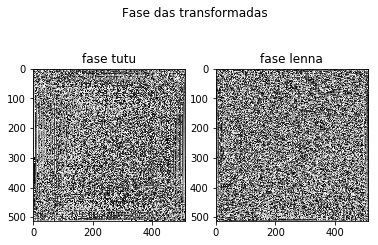

In [12]:
tutu_abs = np.abs(tutu_fft)
lenna_abs = np.abs(lenna_fft)

tutu_shift = np.log(np.fft.fftshift(tutu_abs))
lenna_shift = np.log(np.fft.fftshift(lenna_abs))

show_figs(tutu_shift,
          lenna_shift,
          "Magnitude das transformadas",
          "magnitude tutu",
          "magnitude lenna")

tutu_angle = np.angle(tutu_fft)
lenna_angle = np.angle(lenna_fft)

show_figs(tutu_angle,
          lenna_angle,
          "Fase das transformadas",
          "fase tutu",
          "fase lenna")

Pode não parecer, mas a gente praticamente terminou! Basta agora a gente montar dois números complexos trocando magnitude e fase entre as imagens. Pra isso a gente usa a aquela função definida lá em cima!

In [13]:
c1 = real2complex(tutu_abs, lenna_angle)
c2 = real2complex(lenna_abs, tutu_angle)

Pra finalizar, basta passar as variáveis c1 e c2 para a função inversa, com o cuidado de mostrar a parte real (ifft2() retorna um complexo):

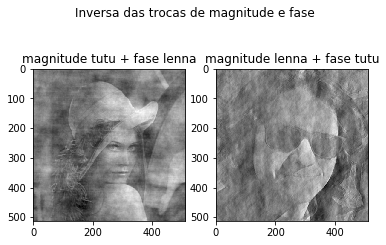

In [15]:
ans1 = np.fft.ifft2(c1).real
ans2 = np.fft.ifft2(c2).real

show_figs(ans1,
          ans2,
          "Inversa das trocas de magnitude e fase",
          "magnitude tutu + fase lenna",
          "magnitude lenna + fase tutu")

E pronto! Como comentei lá em cima eu não sei se essa é a forma 100% correta. Espero ter ajudado, qualquer coisa é só falar. Script completo:

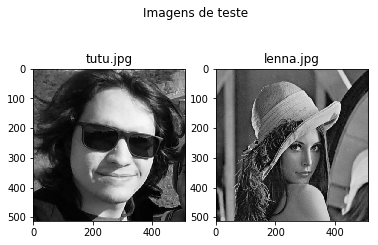

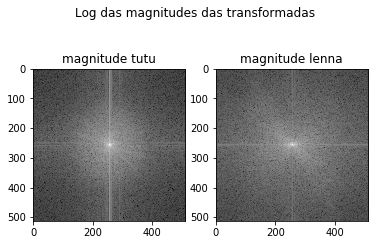

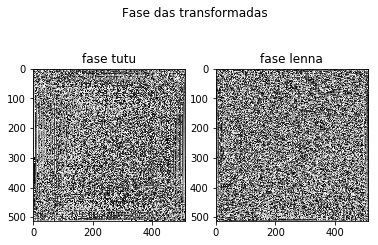

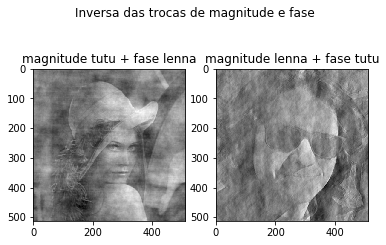

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def real2complex(mag, ang):
	return mag * np.exp(1j*ang)

def show_figs(fig1, fig2, suptitle, t1, t2):
	plt.subplot(1, 2, 1)
	plt.imshow(fig1, cmap="gray")
	plt.title(t1)
	
	plt.subplot(1, 2, 2)
	plt.imshow(fig2, cmap="gray")
	plt.title(t2)
	
	plt.suptitle(suptitle)
	plt.show()
	plt.close()

tutu = cv2.imread("tutu.jpg", cv2.IMREAD_GRAYSCALE)
lenna = cv2.imread("lenna.jpg", cv2.IMREAD_GRAYSCALE)

show_figs(tutu,
	      lenna,
	      "Imagens de teste",
	      "tutu.jpg",
	      "lenna.jpg")

tutu_fft = np.fft.fft2(tutu)
lenna_fft = np.fft.fft2(lenna)

tutu_abs = np.abs(tutu_fft)
lenna_abs = np.abs(lenna_fft)

tutu_shift = np.log(np.fft.fftshift(tutu_abs))
lenna_shift = np.log(np.fft.fftshift(lenna_abs))

show_figs(tutu_shift,
	      lenna_shift,
	      "Log das magnitudes das transformadas",
	      "magnitude tutu",
	      "magnitude lenna")
	
tutu_angle = np.angle(tutu_fft)
lenna_angle = np.angle(lenna_fft)

show_figs(tutu_angle,
	      lenna_angle,
	      "Fase das transformadas",
	      "fase tutu",
	      "fase lenna")

c1 = real2complex(tutu_abs, lenna_angle)
c2 = real2complex(lenna_abs, tutu_angle)

ans1 = np.fft.ifft2(c1).real
ans2 = np.fft.ifft2(c2).real

show_figs(ans1,
	      ans2,
	      "Inversa das trocas de magnitude e fase",
	      "magnitude tutu + fase lenna",
	      "magnitude lenna + fase tutu")